## Reading in timezone corrected CW3E forcing (new) for UCRB

In [1]:
import sys
from parflow.tools.io import read_pfb,write_pfb
import numpy as np
import pandas as pd

In [15]:
organized_dir = '/home/ad4430/Forcing_Adjustment_Ashley/updated_comparison/csv_outputs'

pfb_read_path = '/hydrodata/temp/CW3E_Forcing_Update_21_Jan_24/processing/processed_data/hourly/WY2005/'

# pfb_read_path = f'/hydrodata/temp/CW3E_Forcing_Update_21_Jan_24/processing/processed_data/hourly/WY2003_UCRB/WY2003_lapsed/'

# pfb_read_path_UCRB = f'/hydrodata/temp/CW3E_Forcing_Update_21_Jan_24/processing/processed_data/hourly/WY2003_UCRB/WY2003_lapsed/'

pfb_name = 'CW3E.Temp.'

# Files for SNOTEL average temperature observations (in C) from Hydrodata
# data_file = 'Hydrodata_temperature_obs_daily_average_WY2003.csv'
# metadata_file = 'Hydrodata_temperature_metadata_daily_average_WY2003.csv'

data_file = 'Hydrodata_temperature_obs_daily_average_WY2005.csv'
metadata_file = 'Hydrodata_temperature_metadata_daily_average_WY2005.csv'



In [16]:
# need to change water year and number of days
water_year = 2005
no_days = 365 
no_hours = 8760
variable = 'Temp_C'

# UCRB domain
u_nx = 601 # how many cells across your bounding box is (hztl)
u_ny = 871 # how many cells across your bounding box is (vtcl)

# CONUS2 domain
c_ny = 3256
c_nx = 4442

In [4]:
new_daily_matched_CONUS_csv = f'New_CW3E_CONUS_Daily_matched_{variable}_{water_year}.csv' # ming CW3E matched to observations
new_daily_matched_UCRB_csv = f'New_CW3E_UCRB_Daily_matched_{variable}_{water_year}.csv' # ming CW3E matched to observations, just UCRB sites

In [5]:
# Set up array for daily mean temp
daily_mean = np.zeros((no_days, c_ny, c_nx)) # array of daily averages across CONUS2 
daily_mean.shape

(365, 3256, 4442)

## 1. Load in already matched observation files, make sure all in Kelvin

In [6]:
# SNOTEL observation data for all CONUS2 sites
obs_CONUS = pd.read_csv(f'/home/ad4430/ashley_intern_research_2023/precip_temp/Organized_csv/temperature/{data_file}', index_col=['site_id'])
obs_CONUS = obs_CONUS.drop(columns=['Unnamed: 0'])
obs_CONUS = obs_CONUS.drop(columns=['num_obs'])
obs_CONUS = obs_CONUS +273.15
obs_CONUS.head() 

,2005-10-01,2005-10-02,2005-10-03,2005-10-04,2005-10-05,2005-10-06,2005-10-07,2005-10-08,2005-10-09,2005-10-10,...,2006-09-21,2006-09-22,2006-09-23,2006-09-24,2006-09-25,2006-09-26,2006-09-27,2006-09-28,2006-09-29,2006-09-30
site_id,,,,,,,,,,,,,,,,,,,,,
301:CA:SNTL,282.05,276.65,275.35,275.05,278.35,281.95,280.35,279.15,278.55,280.25,...,282.15,279.15,280.35,282.85,281.75,283.15,284.15,285.05,285.35,283.05
907:UT:SNTL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,279.25,275.05,276.35,279.15,282.35,285.05,285.85,286.45,287.25,287.25
916:MT:SNTL,282.65,273.55,272.55,270.65,270.75,275.55,277.95,272.85,271.35,273.45,...,273.95,271.85,273.45,275.85,280.75,281.75,278.25,283.55,282.95,284.85
908:WA:SNTL,277.65,277.65,277.35,278.55,281.05,281.25,279.55,278.85,280.15,280.85,...,279.05,279.95,284.25,287.35,287.75,288.05,289.55,287.85,286.75,281.75
302:OR:SNTL,273.55,269.05,269.55,268.65,271.05,276.45,275.75,271.85,271.35,275.35,...,274.15,273.55,274.45,277.25,279.65,279.85,280.45,281.35,281.05,283.15


In [17]:
# SNOTEL metadata for all CONUS2 sites
metadata_CONUS = pd.read_csv(f'/home/ad4430/ashley_intern_research_2023/precip_temp/Organized_csv/temperature/{metadata_file}', index_col=['site_id'])
metadata_CONUS = metadata_CONUS.drop(columns=['Unnamed: 0'])
metadata_CONUS.head()

,site_type,agency,site_name,site_id_agency,site_query_url,date_metadata_last_updated,latitude,longitude,state,huc,...,latest_download_date,file_path,county_name,elevation,shef_id,acton_id,conus1_x,conus1_y,conus2_x,conus2_y
site_id,,,,,,,,,,,,,,,,,,,,,
1000:OR:SNTL,SNOTEL station,NRCS,Annie Springs,1000:OR:SNTL,https://wcc.sc.egov.usda.gov/awdbWebService/we...,2023-03-07,42.87007,-122.16518,OR,180102030101,...,2023-05-14,/hydrodata/national_obs/point_meteorology/NRCS...,Klamath,6010.0,ANSO3,22G06S,NaN,NaN,258,2286
1005:CO:SNTL,SNOTEL station,NRCS,Ute Creek,1005:CO:SNTL,https://wcc.sc.egov.usda.gov/awdbWebService/we...,2023-03-07,37.61480,-105.37322,CO,130100020604,...,2023-05-14,/hydrodata/national_obs/point_meteorology/NRCS...,Costilla,10734.0,UTCC2,05M17S,1063.0,495.0,1490,1448
1006:NV:SNTL,SNOTEL station,NRCS,Lewis Peak,1006:NV:SNTL,https://wcc.sc.egov.usda.gov/awdbWebService/we...,2023-03-07,40.35720,-116.86470,NV,160401070903,...,2023-05-14,/hydrodata/national_obs/point_meteorology/NRCS...,Lander,7370.0,LWPN2,16J01S,137.0,957.0,592,1908
1008:MT:SNTL,SNOTEL station,NRCS,Onion Park,1008:MT:SNTL,https://wcc.sc.egov.usda.gov/awdbWebService/we...,2023-03-07,46.91348,-110.85360,MT,100301030801,...,2023-05-14,/hydrodata/national_obs/point_meteorology/NRCS...,Meagher,7410.0,ONPM8,10C22S,753.0,1575.0,1196,2499
1009:MT:SNTL,SNOTEL station,NRCS,Stringer Creek,1009:MT:SNTL,https://wcc.sc.egov.usda.gov/awdbWebService/we...,2023-03-07,46.92690,-110.90198,MT,100301030801,...,2023-05-14,/hydrodata/national_obs/point_meteorology/NRCS...,Meagher,6550.0,STCM8,10C23S,750.0,1577.0,1193,2501


In [8]:
# # SNOTEL observation data for just UCRB, matched
# obs_UCRB = pd.read_csv(f'/home/ad4430/Forcing_Adjustment_Ashley/UCRB_lrc_comparison/kelvin/SNOTEL_Daily_matched_UCRB_Temp_C_2003_ALLsites.csv', index_col=['site_id'])
# obs_UCRB.head()

In [9]:

# this one has ucrb coordinates
metadata_UCRB = pd.read_csv(f'/home/ad4430/Forcing_Adjustment_Ashley/UCRB_lrc_comparison/kelvin/UCRB_metadata', index_col = ['site_id'])
metadata_UCRB.head()


,site_type,agency,site_name,site_id_agency,site_query_url,date_metadata_last_updated,latitude,longitude,state,huc,...,elevation,shef_id,acton_id,conus1_x,conus1_y,conus2_x,conus2_y,num_obs,ucrb_x,ucrb_y
site_id,,,,,,,,,,,,,,,,,,,,,
1014:CO:SNTL,SNOTEL station,NRCS,Middle Fork Camp,1014:CO:SNTL,https://wcc.sc.egov.usda.gov/awdbWebService/we...,2023-03-07,39.79565,-106.02802,CO,140100010402,...,8969.0,MFKC2,06K12S,1032,740,1461,1689,365,564,436
342:WY:SNTL,SNOTEL station,NRCS,Big Sandy Opening,342:WY:SNTL,https://wcc.sc.egov.usda.gov/awdbWebService/we...,2023-03-07,42.64580,-109.25965,WY,140401040101,...,9080.0,BGSW4,09G09S,805,1087,1242,2027,365,345,774
345:CO:SNTL,SNOTEL station,NRCS,Bison Lake,345:CO:SNTL,https://wcc.sc.egov.usda.gov/awdbWebService/we...,2023-03-07,39.76458,-107.35628,CO,140100011401,...,10964.0,BLSC2,07K12S,919,750,1351,1699,364,454,446
368:UT:SNTL,SNOTEL station,NRCS,Brown Duck,368:UT:SNTL,https://wcc.sc.egov.usda.gov/awdbWebService/we...,2023-03-07,40.58102,-110.58587,UT,140600030604,...,10574.0,BNDU1,10J30S,661,878,1101,1825,364,204,572
371:UT:SNTL,SNOTEL station,NRCS,Buck Flat,371:UT:SNTL,https://wcc.sc.egov.usda.gov/awdbWebService/we...,2023-03-07,39.13400,-111.43722,UT,140600090302,...,9409.0,BUFU1,11K31S,563,733,1004,1684,365,107,431


In [18]:
# make CONUS2 x and y into arrays for the for loop
conus_y = np.asarray(metadata_CONUS['conus2_y'])
conus_x = np.asarray(metadata_CONUS['conus2_x'])

ucrb_y = np.asarray(metadata_UCRB['ucrb_y'])
ucrb_x = np.asarray(metadata_UCRB['ucrb_x'])

In [11]:
print(pfb_read_path)

/hydrodata/temp/CW3E_Forcing_Update_21_Jan_24/processing/processed_data/hourly/WY2006/


In [14]:
# 2006
print(metadata_CONUS['conus2_y'])
print(metadata_CONUS['conus2_x'])

site_id
1000:OR:SNTL    2286
1005:CO:SNTL    1448
1006:NV:SNTL    1908
1008:MT:SNTL    2499
1009:MT:SNTL    2501
                ... 
988:ID:SNTL     2796
989:ID:SNTL     2580
990:WA:SNTL     2881
991:WA:SNTL     2887
999:WA:SNTL     2878
Name: conus2_y, Length: 753, dtype: int64
site_id
1000:OR:SNTL     258
1005:CO:SNTL    1490
1006:NV:SNTL     592
1008:MT:SNTL    1196
1009:MT:SNTL    1193
                ... 
988:ID:SNTL      825
989:ID:SNTL      763
990:WA:SNTL      518
991:WA:SNTL      533
999:WA:SNTL      485
Name: conus2_x, Length: 753, dtype: int64


In [19]:
print(metadata_CONUS['conus2_y'])
print(metadata_CONUS['conus2_x'])

site_id
1000:OR:SNTL    2286
1005:CO:SNTL    1448
1006:NV:SNTL    1908
1008:MT:SNTL    2499
1009:MT:SNTL    2501
                ... 
985:WA:SNTL     2531
988:ID:SNTL     2796
989:ID:SNTL     2580
990:WA:SNTL     2881
991:WA:SNTL     2887
Name: conus2_y, Length: 726, dtype: int64
site_id
1000:OR:SNTL     258
1005:CO:SNTL    1490
1006:NV:SNTL     592
1008:MT:SNTL    1196
1009:MT:SNTL    1193
                ... 
985:WA:SNTL      709
988:ID:SNTL      825
989:ID:SNTL      763
990:WA:SNTL      518
991:WA:SNTL      533
Name: conus2_x, Length: 726, dtype: int64


In [20]:
obs_CONUS.head()

,2005-10-01,2005-10-02,2005-10-03,2005-10-04,2005-10-05,2005-10-06,2005-10-07,2005-10-08,2005-10-09,2005-10-10,...,2006-09-21,2006-09-22,2006-09-23,2006-09-24,2006-09-25,2006-09-26,2006-09-27,2006-09-28,2006-09-29,2006-09-30
site_id,,,,,,,,,,,,,,,,,,,,,
301:CA:SNTL,282.05,276.65,275.35,275.05,278.35,281.95,280.35,279.15,278.55,280.25,...,282.15,279.15,280.35,282.85,281.75,283.15,284.15,285.05,285.35,283.05
907:UT:SNTL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,279.25,275.05,276.35,279.15,282.35,285.05,285.85,286.45,287.25,287.25
916:MT:SNTL,282.65,273.55,272.55,270.65,270.75,275.55,277.95,272.85,271.35,273.45,...,273.95,271.85,273.45,275.85,280.75,281.75,278.25,283.55,282.95,284.85
908:WA:SNTL,277.65,277.65,277.35,278.55,281.05,281.25,279.55,278.85,280.15,280.85,...,279.05,279.95,284.25,287.35,287.75,288.05,289.55,287.85,286.75,281.75
302:OR:SNTL,273.55,269.05,269.55,268.65,271.05,276.45,275.75,271.85,271.35,275.35,...,274.15,273.55,274.45,277.25,279.65,279.85,280.45,281.35,281.05,283.15


## Read in forcing

In [12]:
# read in new forcing (24 hr increments)
j=0

for i in range(0, 8760, 24): # 8760 hrs in a year, averaging over 24 hour increments --> finding daily mean for 365 days
    t_timestep = str(int(i+24))
   
    x = read_pfb(f'{pfb_read_path}' + f'{pfb_name}' + str(i+1).rjust(6, '0') + "_to_" + t_timestep.rjust(6, '0') +".pfb")
    print(f'{pfb_read_path}' + f'{pfb_name}' + str(i+1).rjust(6, '0') + "_to_" + t_timestep.rjust(6, '0') +".pfb")
    #x = x[:,conus_y,conus_x]
    #print(x.shape)
    daily_mean[j,...] = np.mean(x, axis=0)
    print(daily_mean.shape)
    print(j)
    j+=1
    

/hydrodata/temp/CW3E_Forcing_Update_21_Jan_24/processing/processed_data/hourly/WY2006/CW3E.Temp.000001_to_000024.pfb


/home/SHARED/virtual-environments/parflow-shared/conda/lib/python3.11/site-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


(365, 3256, 4442)
0
/hydrodata/temp/CW3E_Forcing_Update_21_Jan_24/processing/processed_data/hourly/WY2006/CW3E.Temp.000025_to_000048.pfb
(365, 3256, 4442)
1
/hydrodata/temp/CW3E_Forcing_Update_21_Jan_24/processing/processed_data/hourly/WY2006/CW3E.Temp.000049_to_000072.pfb
(365, 3256, 4442)
2


In [25]:
obs_CONUS.head()
print(obs_CONUS.index)

Index(['301:CA:SNTL', '907:UT:SNTL', '916:MT:SNTL', '908:WA:SNTL',
       '302:OR:SNTL', '1000:OR:SNTL', '303:CO:SNTL', '1030:CO:SNTL',
       '304:OR:SNTL', '305:CO:SNTL',
       ...
       '2085:AR:SCAN', '2030:AR:SCAN', '2084:AR:SCAN', '2035:MS:SCAN',
       '2009:FL:SCAN', '2026:AZ:SCAN', '2013:GA:SCAN', '2108:NM:SCAN',
       '2053:AL:SCAN', '2038:SC:SCAN'],
      dtype='object', name='site_id', length=746)


In [24]:
# match new forcing to conus sites
daily_matched_CONUS = np.zeros(obs_CONUS.shape)
for i in range(no_days):
    #print(f'reading in temp for day {i+1}')
    for j in range(len(obs_CONUS.index)):
        #print((obs_data.index.values[j]))
        if (conus_y[j] < 0) or (conus_y[j] > c_ny):
         #   print('Gage outside conus boooo')
            daily_matched_CONUS[j,i] = np.nan
        
        elif (conus_x[j] < 0) or (conus_x[j] > c_nx):
        #    print('Gage outside ucrb boooo')
            daily_matched_CONUS[j,i] = np.nan
        else:
            daily_matched_CONUS[j,i] = daily_mean[i, conus_y[j], conus_x[j]] # check if need -1?

daily_matched_CONUS.shape
daily_matched_CONUS
print(daily_matched_CONUS[0, 0])

282.2854652404785


In [34]:
# Organize PF daily matched array with the same index and dates as the obs_data
daily_matched_CONUS = pd.DataFrame(daily_matched_CONUS)
daily_matched_CONUS = daily_matched_CONUS.set_index(obs_CONUS.index)
column_headers = list(obs_CONUS.columns.values)
daily_matched_CONUS.columns = column_headers
daily_matched_CONUS

,2013-10-01,2013-10-02,2013-10-03,2013-10-04,2013-10-05,2013-10-06,2013-10-07,2013-10-08,2013-10-09,2013-10-10,...,2014-09-21,2014-09-22,2014-09-23,2014-09-24,2014-09-25,2014-09-26,2014-09-27,2014-09-28,2014-09-29,2014-09-30
site_id,,,,,,,,,,,,,,,,,,,,,
301:CA:SNTL,274.974860,272.987246,272.805180,276.105952,278.529627,281.675917,278.907176,275.215008,274.163741,276.388205,...,289.533583,288.809826,286.736514,283.993052,281.022503,278.124702,278.518000,281.660006,283.295097,279.400862
907:UT:SNTL,282.791557,281.511720,281.225335,276.248053,270.753373,274.448713,279.221486,281.230214,280.225098,278.212802,...,284.276718,282.322759,283.341377,283.031086,284.033518,284.618099,284.484727,282.956427,281.250902,276.982845
916:MT:SNTL,283.636637,281.494156,275.559911,272.741665,275.742062,282.183086,286.791195,281.279538,277.605667,277.553455,...,289.029273,285.936363,289.143457,291.048574,290.252650,285.845884,282.639810,279.834290,278.555340,279.310127
908:WA:SNTL,275.160562,275.710515,272.251022,270.172988,272.508699,276.667952,280.480703,277.250633,274.598413,275.967065,...,284.447777,285.635620,286.068141,287.521174,290.335505,288.425608,280.632501,277.633414,278.626434,278.386073
1239:CA:SNTLT,276.080407,276.570268,273.216347,270.997396,273.252206,277.483112,281.305721,277.880367,275.291231,276.625142,...,285.355136,286.373867,286.753085,288.338373,291.060215,289.179611,281.565362,278.625896,279.563798,279.282294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2205:TX:SCAN,273.992502,274.758914,275.243852,275.440756,278.644662,281.896303,278.914693,276.194033,275.216885,276.000863,...,289.398326,288.175954,285.709332,283.322412,281.161625,280.373645,281.894122,283.909148,283.244626,279.440528
2139:UT:SCAN,279.142026,279.789374,280.480385,280.773416,282.928988,285.346228,283.614152,281.326406,279.637987,280.085100,...,291.524012,290.712176,288.950287,287.444163,285.704529,284.892677,286.465633,288.136417,287.766121,284.753757
2108:NM:SCAN,281.320674,281.335700,277.056424,270.382952,271.314967,276.524648,281.065230,281.093399,279.113632,276.810571,...,282.872798,282.290602,284.063179,285.304986,286.409716,286.546925,283.879271,280.488509,278.182006,277.797199


In [35]:
# parse down observation df to include the same stations as the final ParFlow matched df, and make sure they have the same sites
obs_CONUS = obs_CONUS[obs_CONUS.index.isin(daily_matched_CONUS.index)]
daily_matched_CONUS = daily_matched_CONUS[daily_matched_CONUS.index.isin(obs_CONUS.index)]

# parse down metadata df to include the same stations as the final ParFlow matched df
metadata_CONUS = metadata_CONUS[metadata_CONUS.index.isin(daily_matched_CONUS.index)]

print(obs_CONUS.shape)
print(daily_matched_CONUS.shape)
print(metadata_CONUS.shape)

(987, 365)
(987, 365)
(987, 33)


In [36]:
# # create another df of new matched forcing with just sites in UCRB
# daily_matched_UCRB = daily_matched_CONUS[daily_matched_CONUS.index.isin(obs_UCRB.index)]
# obs_UCRB = obs_CONUS[obs_CONUS.index.isin(daily_matched_UCRB.index)]
# daily_matched_UCRB = daily_matched_UCRB[daily_matched_UCRB.index.isin(obs_UCRB.index)]
# metadata_UCRB = metadata_CONUS[metadata_CONUS.index.isin(daily_matched_UCRB.index)]

# print(daily_matched_UCRB.shape)
# print(obs_UCRB.shape)
# print(metadata_UCRB.shape)

# daily_matched_UCRB.head()

In [37]:
daily_matched_CONUS.to_csv(f'{organized_dir}/{new_daily_matched_CONUS_csv}', sep = ",")
#daily_matched_UCRB.to_csv(f'{organized_dir}/{new_daily_matched_UCRB_csv}', sep = ",")

## READ IN NEW FORCING JUST UCRB

In [22]:
# Set up array for daily mean temp
ucrb_daily_mean = np.zeros((no_days, u_ny, u_nx)) # array of daily averages across UCRB 
ucrb_daily_mean.shape

(365, 871, 601)

In [23]:
# make CONUS2 x and y into arrays for the for loop
ucrb_y = np.asarray(metadata_UCRB['ucrb_y'])
ucrb_x = np.asarray(metadata_UCRB['ucrb_x'])

In [9]:
# read in new forcing (24 hr increments)
j=0
for i in range(0, 8760, 24): # 8760 hrs in a year, averaging over 24 hour increments --> finding daily mean for 365 days
    
    t_timestep = str(int(i+24))
   
    x_ucrb = read_pfb(f'{pfb_read_path_UCRB}/' + f'{pfb_name}' + str(i+1).rjust(6, '0') + "_to_" + t_timestep.rjust(6, '0') +".pfb")
    ucrb_daily_mean[j,...] = np.mean(x_ucrb, axis=0)
    print(j)
    j+=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [18]:
# match new forcing to conus sites
new_daily_matched_UCRB = np.zeros(obs_UCRB.shape)
for i in range(no_days):
    print(f'reading in temp for day {i+1}')
    for j in range(len(obs_UCRB.index)):
        #print((obs_data.index.values[j]))
        if (ucrb_y[j] < 0) or (ucrb_y[j] > u_ny):
         #   print('Gage outside ucrb boooo')
            new_daily_matched_UCRB[j,i] = np.nan
        
        elif (ucrb_x[j] < 0) or (ucrb_x[j] > u_nx):
        #    print('Gage outside ucrb boooo')
            new_daily_matched_UCRB[j,i] = np.nan
        else:
            new_daily_matched_UCRB[j,i] = ucrb_daily_mean[i, ucrb_y[j]-1, ucrb_x[j]-1] # check if need -1?

new_daily_matched_UCRB.shape
new_daily_matched_UCRB

reading in temp for day 1
reading in temp for day 2
reading in temp for day 3
reading in temp for day 4
reading in temp for day 5
reading in temp for day 6
reading in temp for day 7
reading in temp for day 8
reading in temp for day 9
reading in temp for day 10
reading in temp for day 11
reading in temp for day 12
reading in temp for day 13
reading in temp for day 14
reading in temp for day 15
reading in temp for day 16
reading in temp for day 17
reading in temp for day 18
reading in temp for day 19
reading in temp for day 20
reading in temp for day 21
reading in temp for day 22
reading in temp for day 23
reading in temp for day 24
reading in temp for day 25
reading in temp for day 26
reading in temp for day 27
reading in temp for day 28
reading in temp for day 29
reading in temp for day 30
reading in temp for day 31
reading in temp for day 32
reading in temp for day 33
reading in temp for day 34
reading in temp for day 35
reading in temp for day 36
reading in temp for day 37
reading in

array([[280.13674291, 278.68276469, 276.69142278, ..., 283.41838328,
        284.06937536, 284.02393723],
       [273.5557518 , 273.04781342, 273.66850789, ..., 280.08573914,
        280.55459086, 280.00979233],
       [274.54853312, 274.34123484, 271.94596481, ..., 281.96794383,
        282.1401151 , 282.32315063],
       ...,
       [278.42006556, 277.29935074, 272.79855728, ..., 287.58861669,
        287.7093811 , 286.86409251],
       [277.93063736, 276.74321365, 275.05104192, ..., 280.87829717,
        281.70993932, 282.08190536],
       [279.36498515, 278.74613063, 275.99393209, ..., 282.86214193,
        283.61077245, 283.74049632]])

In [2]:
import matplotlib.pyplot as plt

j=0
i = 200*24
t_timestep = str(int(i+24))
x = read_pfb(f'{pfb_read_path}' + f'{pfb_name}' + str(i+1).rjust(6, '0') + "_to_" + t_timestep.rjust(6, '0') +".pfb")
daily_mean1 = np.mean(x, axis=0)
#print(j)
plt.imshow(daily_mean1, origin =  "lower")
plt.colorbar()

NameError: name 'read_pfb' is not defined

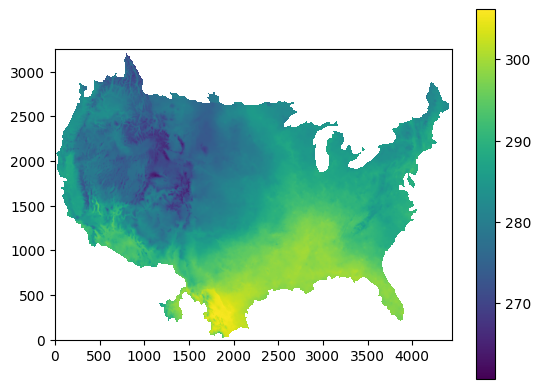

In [30]:
import matplotlib.pyplot as plt

j=0
i = 200*24
t_timestep = str(int(i+24))
x = read_pfb(f'{pfb_read_path}' + f'{pfb_name}' + str(i+1).rjust(6, '0') + "_to_" + t_timestep.rjust(6, '0') +".pfb")
daily_mean2 = np.mean(x, axis=0)
#print(j)
plt.imshow(daily_mean2, origin =  "lower")
plt.colorbar()

/tmp/ipykernel_2931091/3430990818.py:1: RuntimeWarning: invalid value encountered in subtract
  plt.imshow(daily_mean1 - daily_mean2, origin = "lower", cmap = 'seismic') # 2005 - 2006


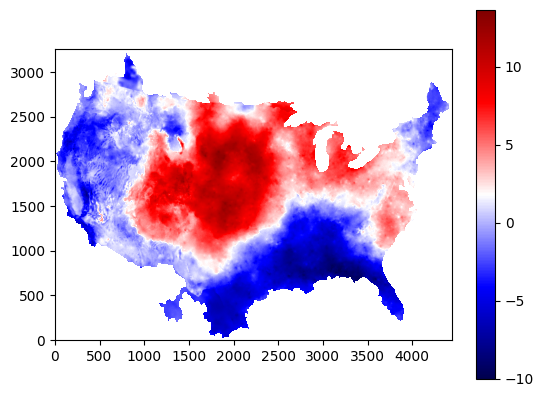

In [33]:
plt.imshow(daily_mean1 - daily_mean2, origin = "lower", cmap = 'seismic') # 2005 - 2006
plt.colorbar()


In [12]:
annual_mean_2005 = daily_mean.mean(axis = 0)


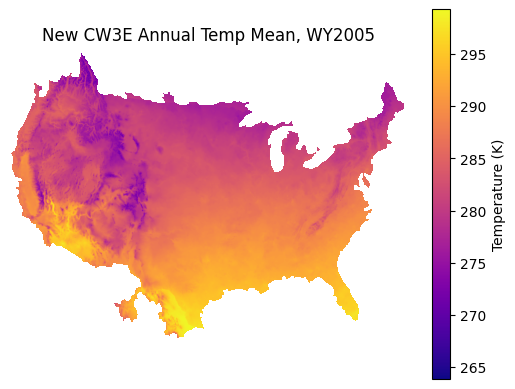

In [16]:
import matplotlib.pyplot as plt

plt.imshow(annual_mean_2005, origin = "lower", cmap = 'plasma') 
plt.title("New CW3E Annual Temp Mean, WY2005")
plt.axis('off')
plt.colorbar(label = "Temperature (K)")
plt.savefig("Newcw3e_2005.png")

In [17]:
np.save('annual_mean_2005.npy', annual_mean_2005)

In [28]:
# RUN THIS

annual_mean_2006 = daily_mean.mean(axis = 0)

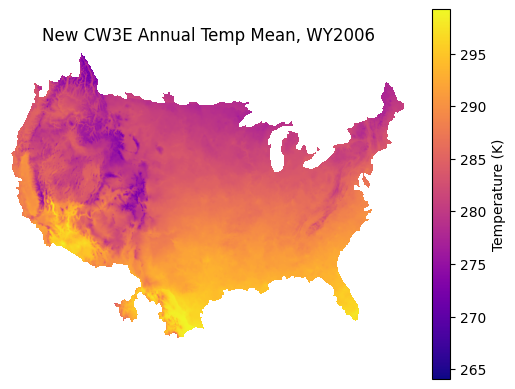

In [29]:
import matplotlib.pyplot as plt

plt.imshow(annual_mean_2006, origin = "lower", cmap = 'plasma') # 2005 - 2006
plt.title("New CW3E Annual Temp Mean, WY2006")
plt.axis('off')
plt.colorbar(label = "Temperature (K)")
plt.savefig("Newcw3e_2006.png")

In [30]:
np.save('annual_mean_2006.npy', annual_mean_2006)

/tmp/ipykernel_3184104/2094216536.py:4: RuntimeWarning: invalid value encountered in subtract
  plt.imshow(annual_mean_2006- annual_mean_2005, origin = "lower", cmap = 'seismic', vmin = -2, vmax = 2) # 2005 - 2006


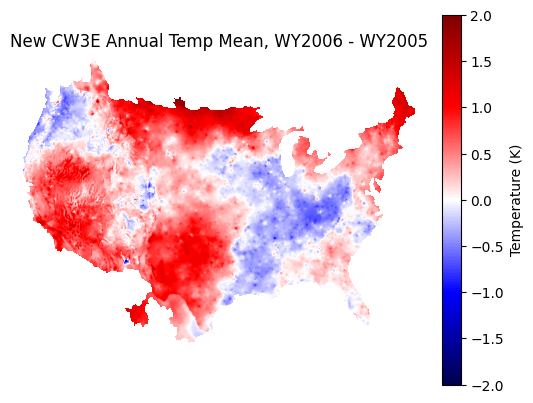

In [32]:
import matplotlib.pyplot as plt
#norm = colors.TwoSlopeNorm(vmin=-, vcenter=0, vmax=2)

plt.imshow(annual_mean_2006- annual_mean_2005, origin = "lower", cmap = 'seismic', vmin = -2, vmax = 2) # 2005 - 2006
plt.title("New CW3E Annual Temp Mean, WY2006 - WY2005")
plt.axis('off')
plt.colorbar(label = "Temperature (K)")
plt.savefig("Newcw3e_05_06_diff.png")

In [23]:
import matplotlib.pyplot as plt
daily_mean = np.zeros((31*24, c_ny, c_nx)) # array of daily averages across CONUS2 


j=0
for i in range(274*24, 274*24+31*24, 24): # month of june
    t_timestep = str(int(i+24))
    t = read_pfb(f'{pfb_read_path}' + f'{pfb_name}' + str(i+1).rjust(6, '0') + "_to_" + t_timestep.rjust(6, '0') +".pfb")
    daily_mean[j,...] = np.mean(t, axis=0)
    j = j+1
summer_mean = daily_mean.mean(axis = 0)


In [19]:
print(summer_mean.min())

-inf


(-0.5, 4441.5, -0.5, 3255.5)

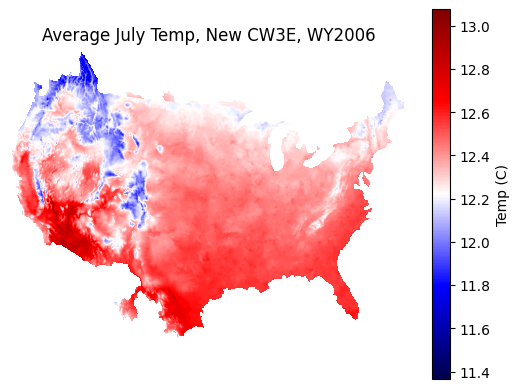

In [22]:
summer_mean = daily_mean.mean(axis = 0)

plt.imshow(summer_mean, origin =  "lower", cmap = 'seismic')
plt.colorbar(label = 'Temp (C)')
plt.title('Average July Temp, New CW3E, WY2006')
plt.axis('off')